In [3]:
#Importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

In [ ]:
# Função para connstrução do gráfico de superfície para visualização da classficação

def plot_decision_surface(data, target, classes, class_names, model):
    min1, max1 = data[:, 0].min()-1, data[:, 0].max()+1
    min2, max2 = data[:, 1].min()-1, data[:, 1].max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.01)
    x2grid = np.arange(min2, max2, 0.01)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))

    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)

    fig = plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.75)

    for class_value in range(len(classes)):
      
      row_ix = np.where(target == class_value)
      plt.scatter(data[row_ix, 0], data[row_ix, 1], label=class_names[class_value], cmap='Paired')
    
    plt.legend(loc='upper left')

# **Testando com modelos de classificação binária**

In [31]:
# Carregando datasets para criação do modelo

iris = load_iris()
X = iris.data[:,2:] # petal length and width in cm
y = (iris.target == 2).astype(np.int) # 1 if Iris virginica, else 0

In [32]:
# Separando os dados em treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=7)

**Teste do Modelo de Classificação com Algoritmo de Regressão Logística**

In [33]:
Logistic = LogisticRegression(penalty='none', random_state=7)
Logistic.fit(X_train, y_train)

acc_train = Logistic.score(X_train, y_train)
acc_test = Logistic.score(X_test, y_test)

print('Acurácia do modelo nos dados de treinamento = %2.2f' % acc_train)
print('Acurácia do modelo nos dados de teste = %2.2f' % acc_test)

Acurácia do modelo nos dados de treinamento = 0.98
Acurácia do modelo nos dados de teste = 0.87


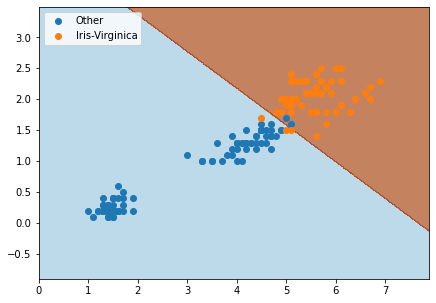

In [34]:
plot_decision_surface(X, y, np.unique(y), ['Other', 'Iris-Virginica'], Logistic)

**Teste do Modelo de Classificação com Algoritmo KNN**

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

acc_train = knn.score(X_train, y_train)
acc_test = knn.score(X_test, y_test)

print('Acurácia do modelo nos dados de treinamento = %2.2f' % acc_train)
print('Acurácia do modelo nos dados de teste = %2.2f' % acc_test)

Acurácia do modelo nos dados de treinamento = 0.98
Acurácia do modelo nos dados de teste = 0.87


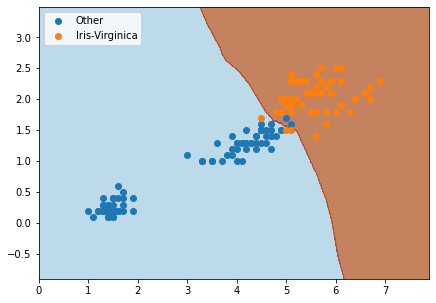

In [36]:
plot_decision_surface(X, y, np.unique(y), ['Other', 'Iris-Virginica'], knn)

**Teste do Modelo de Classificação com Algoritmo de Classificador Naive Bayes**

In [37]:
gNB = GaussianNB()
gNB.fit(X_train, y_train)

acc_train = gNB.score(X_train, y_train)
acc_test = gNB.score(X_test, y_test)

print('Acurácia do modelo nos dados de treinamento = %2.2f' % acc_train)
print('Acurácia do modelo nos dados de teste = %2.2f' % acc_test)

Acurácia do modelo nos dados de treinamento = 0.98
Acurácia do modelo nos dados de teste = 0.93


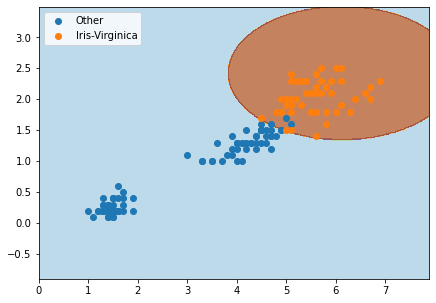

In [38]:
plot_decision_surface(X, y, np.unique(y), ['Other', 'Iris-Virginica'], gNB)

# **Testando com modelos de multiclassificação**

In [39]:
# Carregando datasets para criação do modelo

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [40]:
# Separando os dados em treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=7)

**Teste do Modelo de Classificação com Algoritmo de Regressão multinomial ou Softmax Regression**

In [41]:
Softmax = LogisticRegression(max_iter=1000, penalty='none', random_state=7)
Softmax.fit(X_train, y_train)

acc_train = Softmax.score(X_train, y_train)
acc_test = Softmax.score(X_test, y_test)

print('Acurácia do modelo nos dados de treinamento = %2.2f' % acc_train)
print('Acurácia do modelo nos dados de teste = %2.2f' % acc_test)

Acurácia do modelo nos dados de treinamento = 0.98
Acurácia do modelo nos dados de teste = 0.87


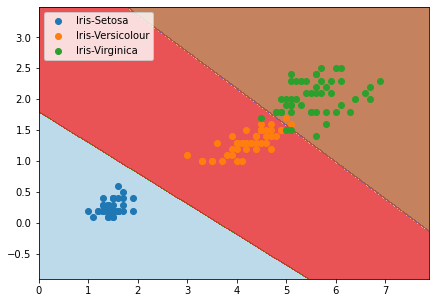

In [42]:
plot_decision_surface(X, y, np.unique(y), ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'], Softmax)

**Teste do Modelo de Classificação com Algoritmo KNN multinomial**

In [43]:
knn = KNeighborsClassifier(n_neighbors=5 , weights='uniform')
knn.fit(X_train, y_train)

acc_train = knn.score(X_train, y_train)
acc_test = knn.score(X_test, y_test)

print('Acurácia do modelo nos dados de treinamento = %2.2f' % acc_train)
print('Acurácia do modelo nos dados de teste = %2.2f' % acc_test)

Acurácia do modelo nos dados de treinamento = 0.98
Acurácia do modelo nos dados de teste = 0.87


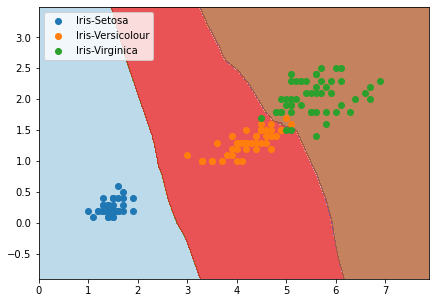

In [28]:
plot_decision_surface(X, y, np.unique(y), ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'], knn)

**Teste do Modelo de Classificação com Algoritmo de Classificador Naive Bayes**

In [44]:
gNB = GaussianNB()
gNB.fit(X_train, y_train)

acc_train = gNB.score(X_train, y_train)
acc_test = gNB.score(X_test, y_test)

print('Acurácia do modelo nos dados de treinamento = %2.2f' % acc_train)
print('Acurácia do modelo nos dados de teste = %2.2f' % acc_test)

Acurácia do modelo nos dados de treinamento = 0.98
Acurácia do modelo nos dados de teste = 0.87


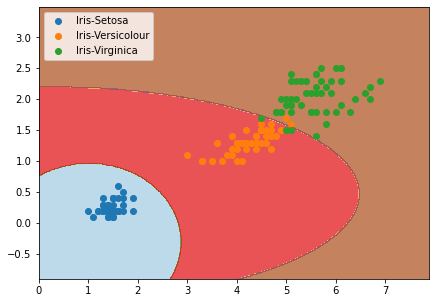

In [45]:
plot_decision_surface(X, y, np.unique(y), ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'], gNB)

In [4]:
# Realizando Leitura de dados
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Tamanho dos dados
df.shape

(200, 5)

In [6]:
# Verificando a natureza dos dados
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Análise estatística Geral
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


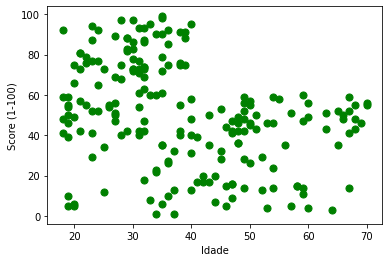

In [11]:
# Plotando gráfico para verificar dispersão dos dados

plt.scatter(df['Age'], df['Spending Score (1-100)'], s=50, c='g')
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.show()

In [12]:
# selecione no dataframe as colunas a serem analisadas
X = df[['Age', 'Spending Score (1-100)']]
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [13]:
# Criando modelo de clusterização com 5 clusters
modelo_kmeans = KMeans(n_clusters=5, init='k-means++')

y_clusters = modelo_kmeans.fit_predict(X)

print(y_clusters)

[0 1 2 1 0 1 2 1 4 1 4 1 4 1 2 1 0 0 4 1 0 1 4 1 4 1 4 0 2 1 4 1 4 1 4 1 2
 1 2 1 3 1 3 0 4 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 2 1 3 1 4 1 4 1 0 1 2 1 4 1 2 1 4 1 0 1 2 1 3 1
 2 1 4 1 4 1 4 1 2 1 2 1 3 1 2 1 4 1 2 1 2 0 2 1 2 1 4 1 4 1 4 1 2 1 4 1 0
 1 4 1 2 1 2 1 2 1 4 1 4 1 2 1]


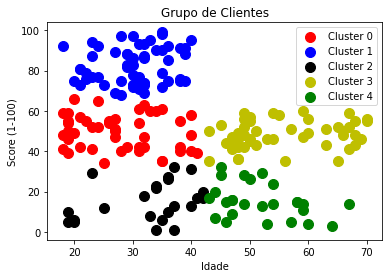

In [14]:
# Plotando gráfico para verificar a posição dos clusters
clusters = 5
cores =['r', 'b', 'k', 'y', 'g']

for k in range(clusters):
    cluster = X[y_clusters==k]
    plt.scatter(cluster['Age'], cluster['Spending Score (1-100)'], s=100, c=cores[k], label='Cluster {}'.format(k))
    
plt.title('Grupo de Clientes')
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.legend()
plt.show()